In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
%matplotlib inline

### Data sets

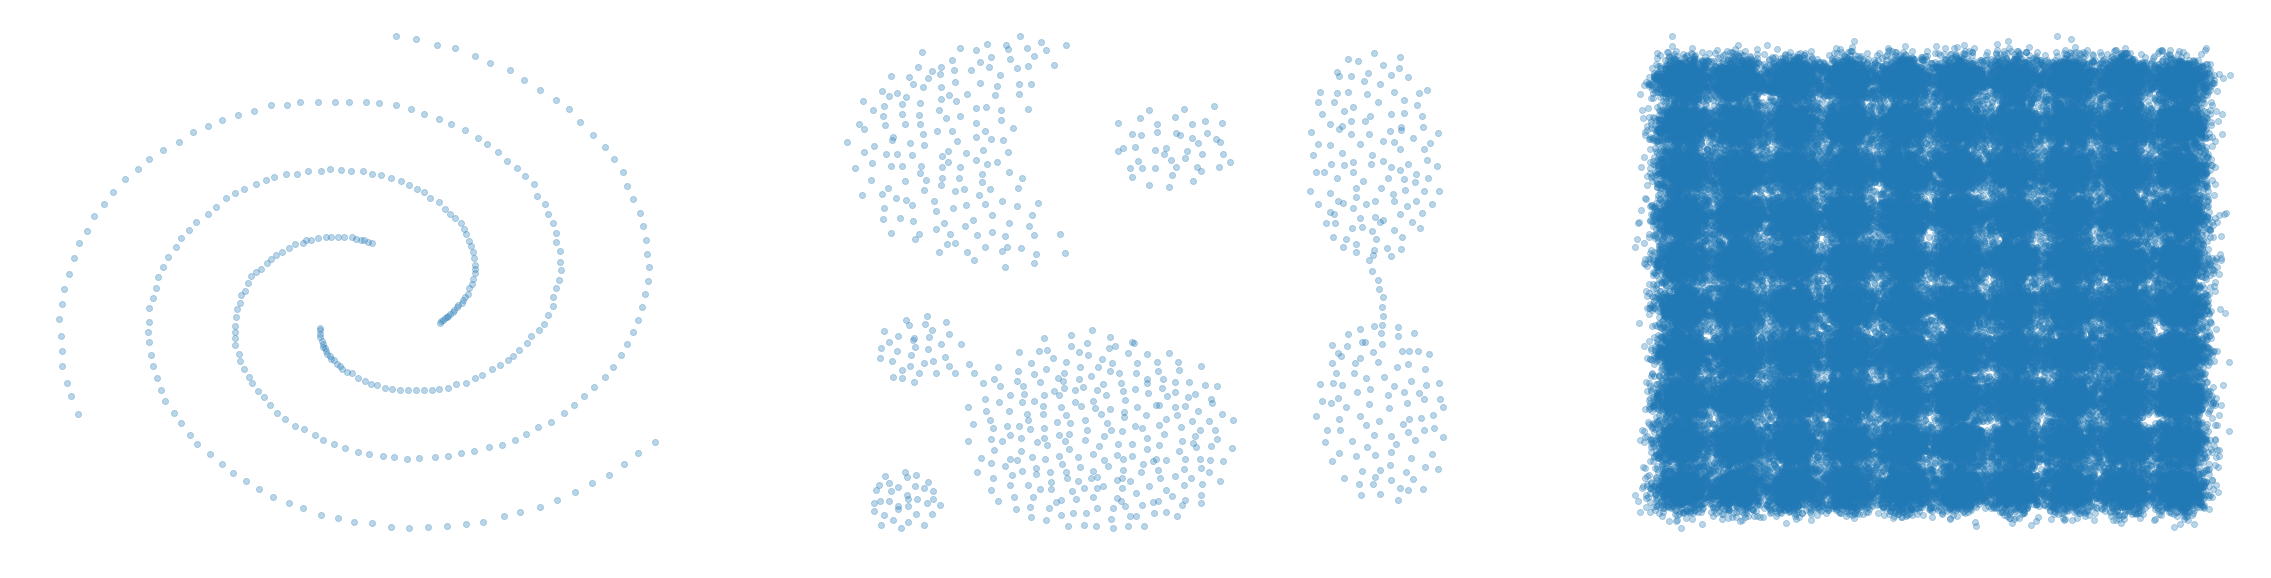

In [2]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

spiral=load_spiral_data(scale = 'True')
axarr[0].scatter(spiral[:,0],spiral[:,1],alpha=.3)
axarr[0].axis('off')

aggr=load_aggregation_data(scale = 'True')
axarr[1].scatter(aggr[:,0],aggr[:,1],alpha=.3)
axarr[1].axis('off')

birch1=load_birch1_data(scale = 'True')
axarr[2].scatter(birch1[:,0],birch1[:,1],alpha=.3)
axarr[2].axis('off')

plt.show()

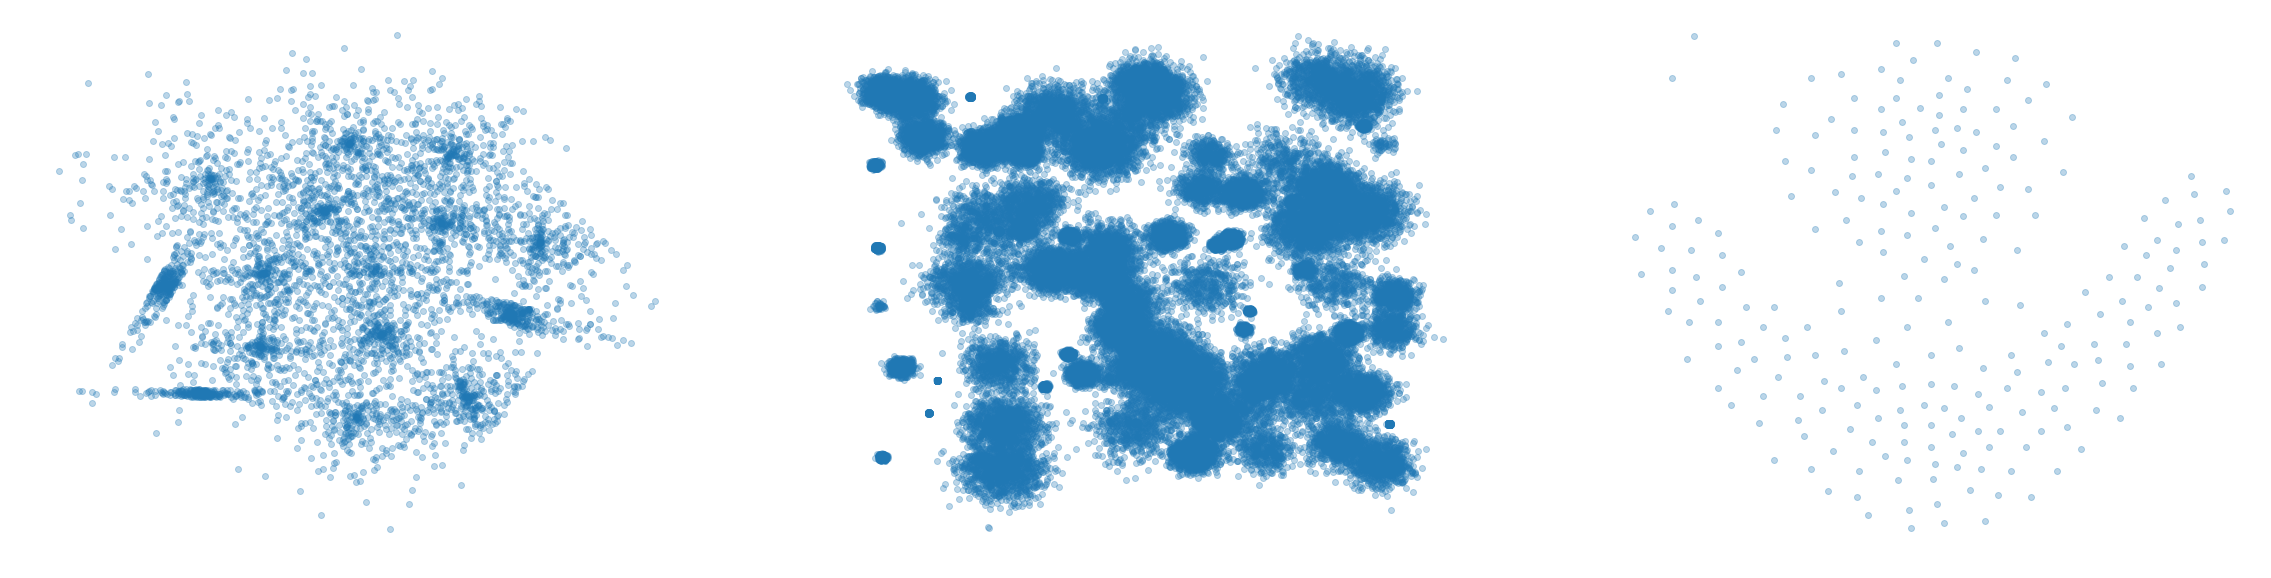

In [3]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

sets=load_sets_data(scale = 'True')
axarr[0].scatter(sets[:,0],sets[:,1],alpha=.3)
axarr[0].axis('off')

birch3=load_birch3_data(scale = 'True')
axarr[1].scatter(birch3[:,0],birch3[:,1],alpha=.3)
axarr[1].axis('off')

flame=load_flame_data(scale = 'True')
axarr[2].scatter(flame[:,0],flame[:,1],alpha=.3)
axarr[2].axis('off')

plt.show()

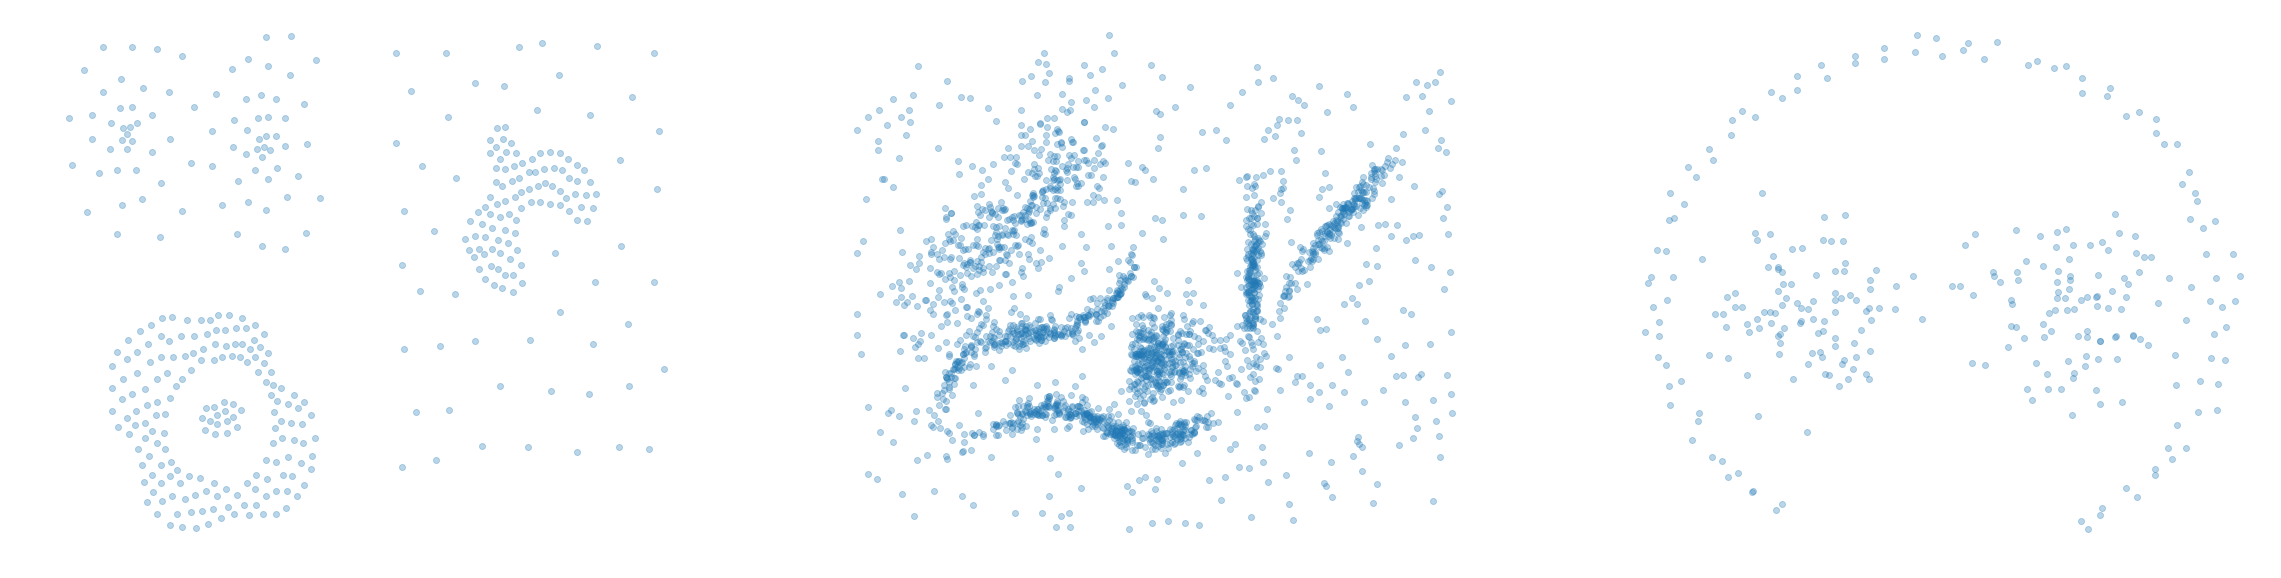

In [4]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

compound = load_compound_data(scale = 'True')
axarr[0].scatter(compound[:,0],compound[:,1],alpha=.3)
axarr[0].axis('off')

fuzzy = load_fuzzy_data(scale = 'True')
axarr[1].scatter(fuzzy[:,0],fuzzy[:,1],alpha=.3)
axarr[1].axis('off')

pathbased = load_pathbased_data(scale = 'True')
axarr[2].scatter(pathbased[:,0],pathbased[:,1],alpha=.3)
axarr[2].axis('off')

plt.show()

### Mean Shift Algorithm

In [5]:
from clustertools.models.density import MeanShift, plot_kde

150 iterations until termination.
Used bandwidth: 0.270000
Finished after 0:00:04.518455
Number of clusters found: 9.000000
There is/are 1.000000 outliers
Max within cluster distance to center: 0.039317
Mean within cluster distance to center: 0.003826
Sum of within cluster squared errors: 0.030303


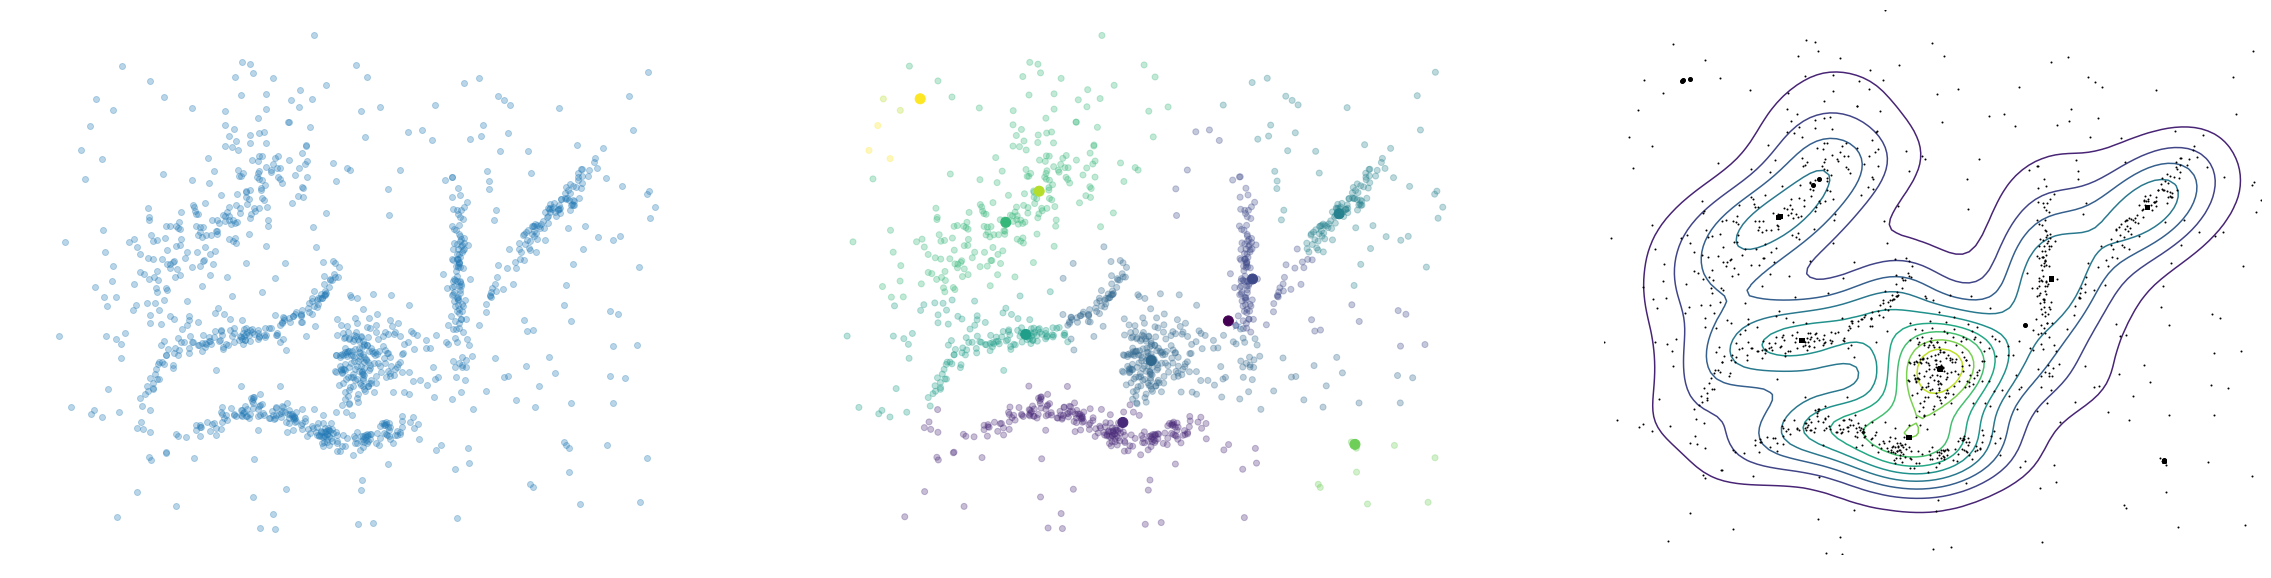

In [6]:
data = fuzzy[np.arange(0,2309,2),:]
ms0 = MeanShift(data, 0.27)
ms0.fit()
clusterlocations = ms0._cluster_centers
results = ms0._results
labels = ms0._cluster_labels
bandwidth = ms0._bandwidth    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(data[:,0],data[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(data[:,0],data[:,1],alpha=.3, c = labels)
if ms0._outliers >0:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(0,max(labels)+1))
else:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
ma=np.max(np.max(Z)) #max of density
mi=np.min(np.min(Z)) #min of density
levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
axarr[2].contour(X,Y,Z, levels)
axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

plt.show()

27 iterations until termination.
Used bandwidth: 0.329038
Finished after 0:00:01.508287
Number of clusters found: 5.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.004221
Mean within cluster distance to center: 0.002796
Sum of within cluster squared errors: 0.006647


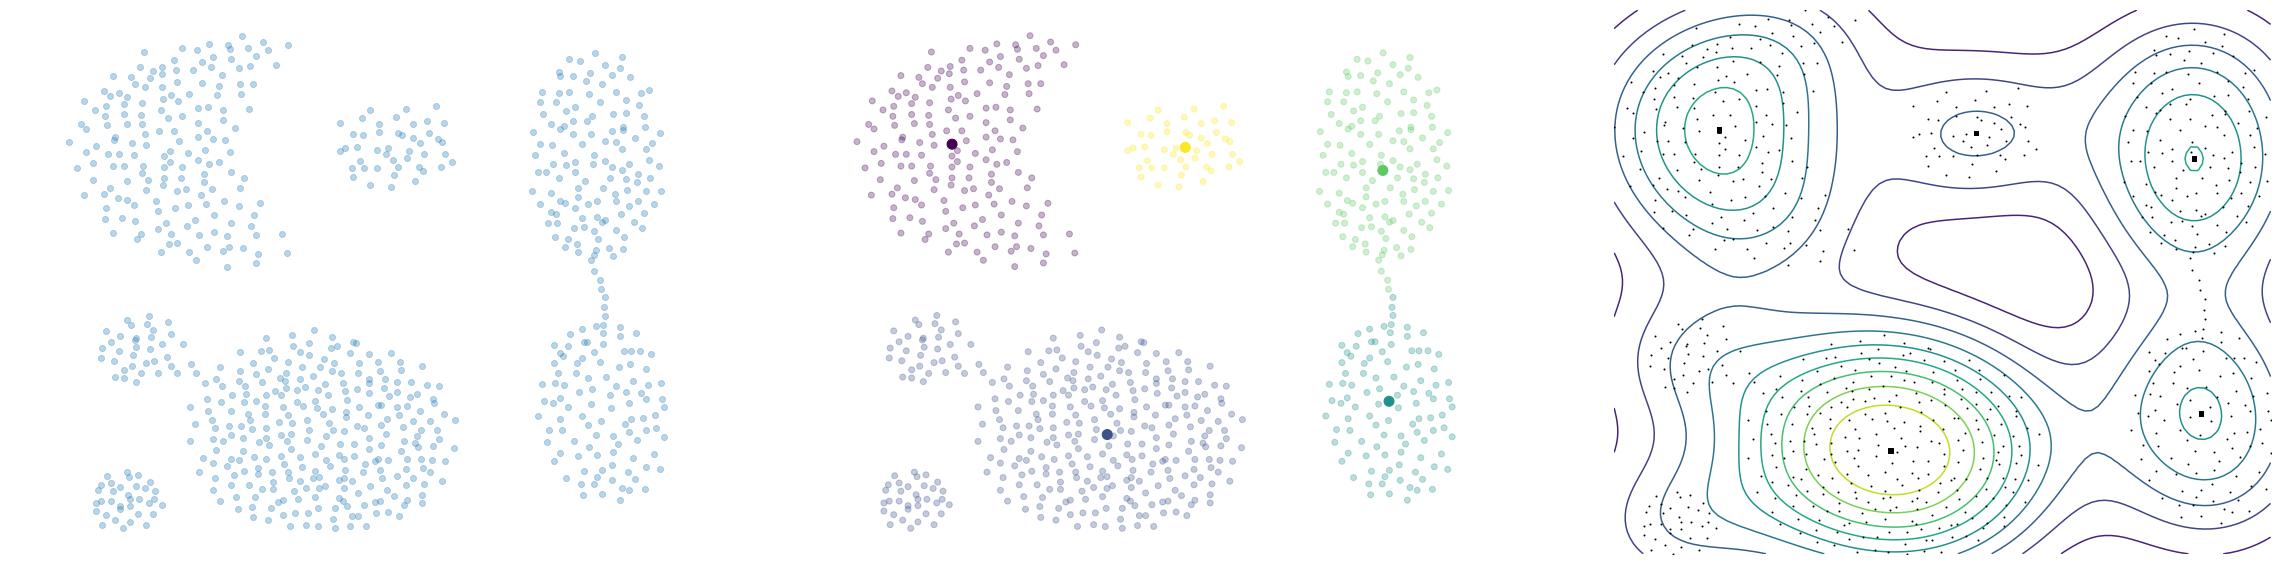

In [7]:
data = aggr[:,:2]
ms1 = MeanShift(data)
ms1.fit()
clusterlocations = ms1._cluster_centers
results = ms1._results
labels = ms1._cluster_labels
bandwidth = ms1._bandwidth    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(data[:,0],data[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(data[:,0],data[:,1],alpha=.3, c = labels)
if ms1._outliers >0:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(0,max(labels)+1))
else:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
ma=np.max(np.max(Z)) #max of density
mi=np.min(np.min(Z)) #min of density
levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
axarr[2].contour(X,Y,Z, levels)
axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

plt.show()

67 iterations until termination.
Used bandwidth: 0.457056
Finished after 0:00:00.562276
Number of clusters found: 2.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.004030
Mean within cluster distance to center: 0.002967
Sum of within cluster squared errors: 0.002317


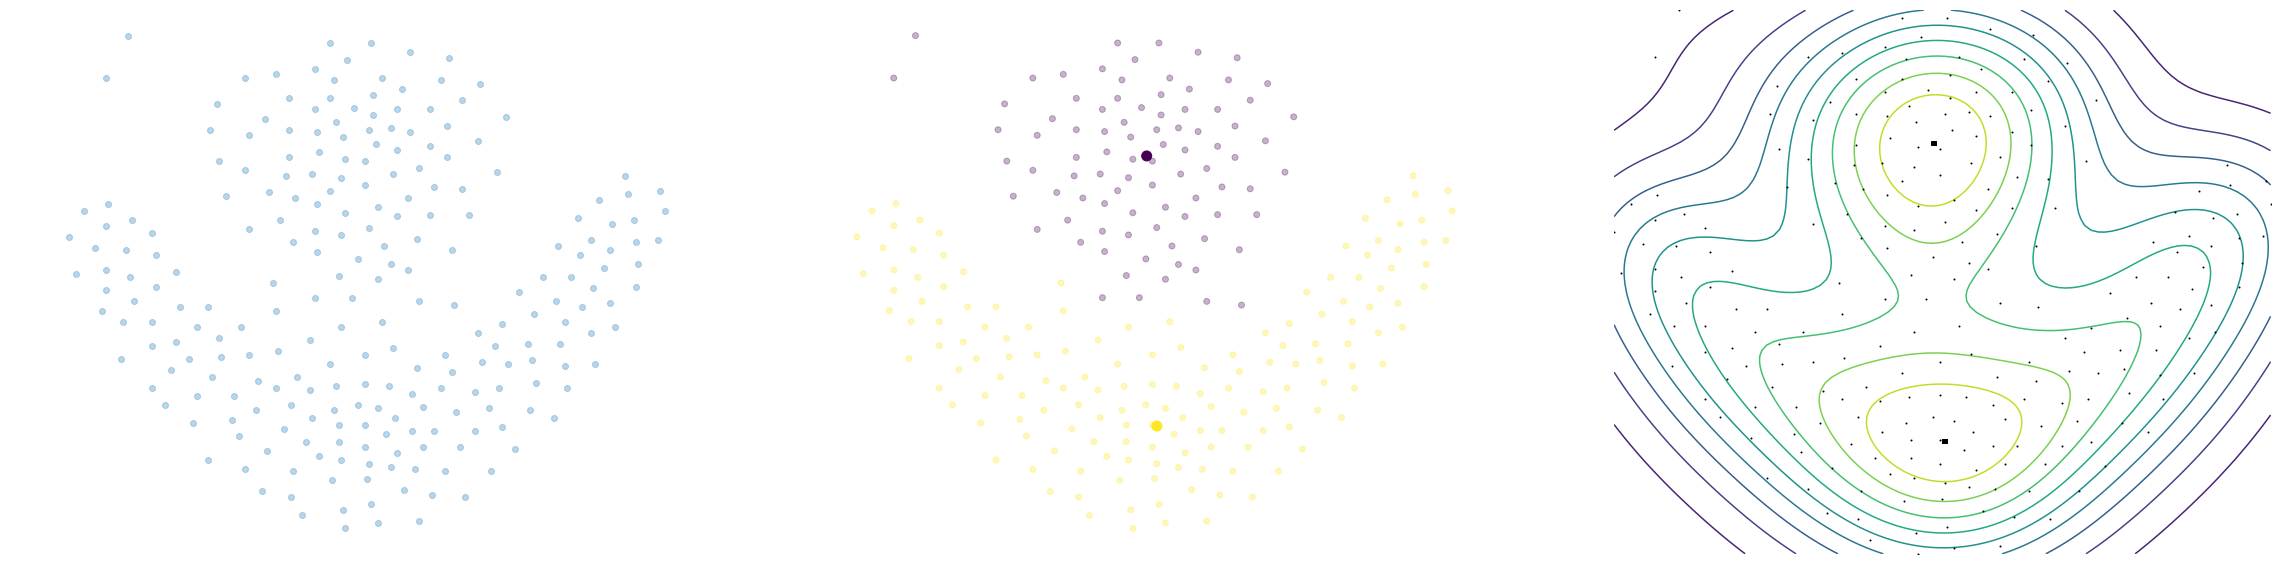

In [8]:
data = flame
ms2 = MeanShift(data)
ms2.fit()
clusterlocations = ms2._cluster_centers
results = ms2._results
labels = ms2._cluster_labels
bandwidth = ms2._bandwidth    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(data[:,0],data[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(data[:,0],data[:,1],alpha=.3, c = labels)
if ms2._outliers >0:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(0,max(labels)+1))
else:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
ma=np.max(np.max(Z)) #max of density
mi=np.min(np.min(Z)) #min of density
levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
axarr[2].contour(X,Y,Z, levels)
axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

plt.show()

101 iterations until termination.
Used bandwidth: 0.442716
Finished after 0:00:00.633231
Number of clusters found: 6.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.192016
Mean within cluster distance to center: 0.003652
Sum of within cluster squared errors: 0.045193


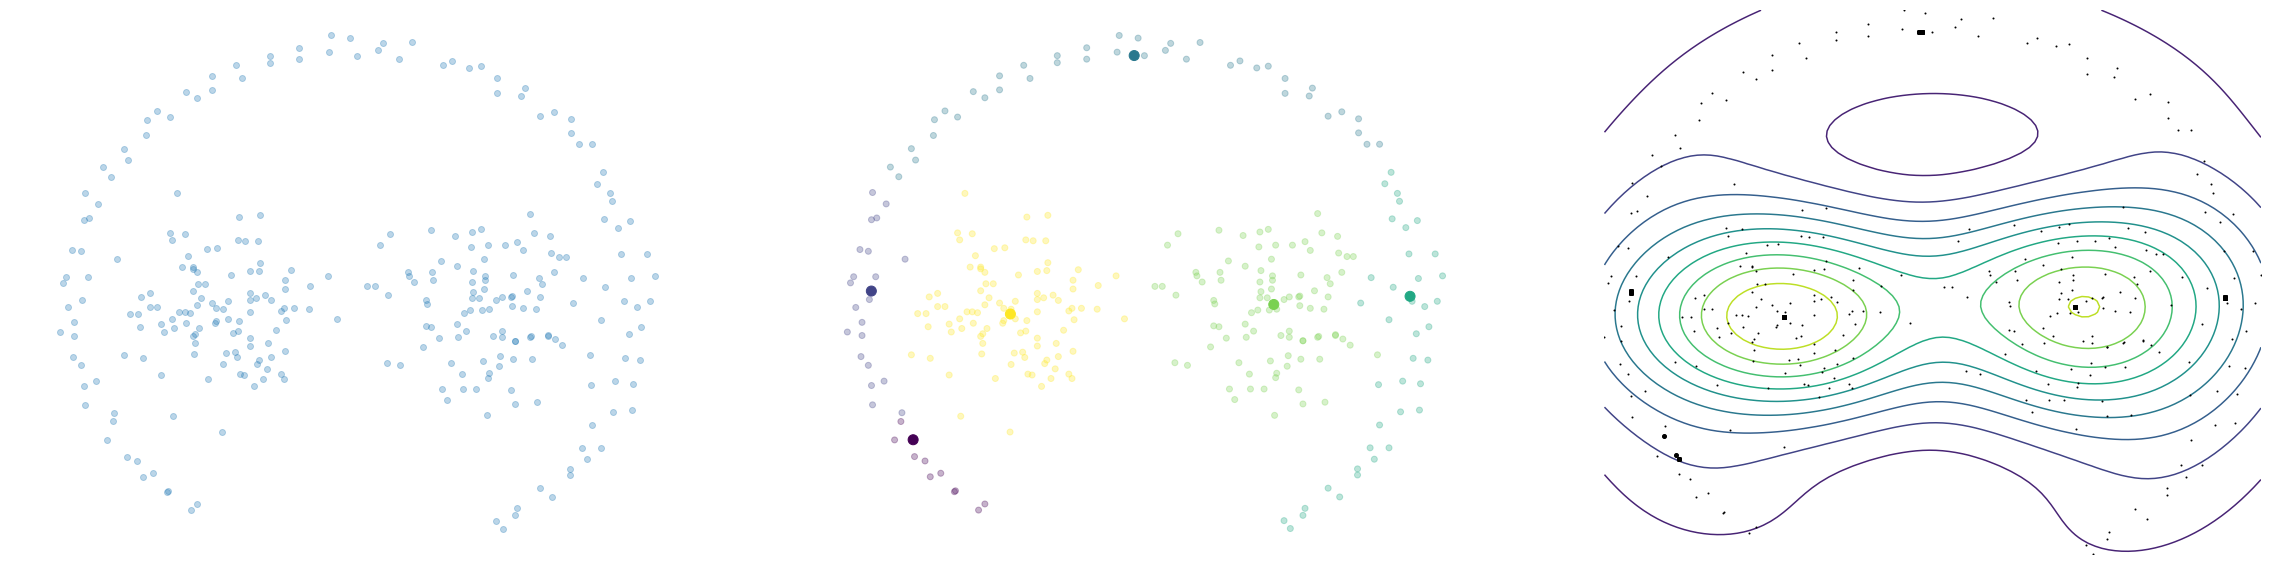

In [9]:
data = pathbased
ms3 = MeanShift(data)
ms3.fit()
clusterlocations = ms3._cluster_centers
results = ms3._results
labels = ms3._cluster_labels
bandwidth = ms3._bandwidth    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(data[:,0],data[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(data[:,0],data[:,1],alpha=.3, c = labels)
if ms3._outliers >0:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(0,max(labels)+1))
else:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
ma=np.max(np.max(Z)) #max of density
mi=np.min(np.min(Z)) #min of density
levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
axarr[2].contour(X,Y,Z, levels)
axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

plt.show()

34 iterations until termination.
Used bandwidth: 0.368557
Finished after 0:00:00.706500
Number of clusters found: 3.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.006314
Mean within cluster distance to center: 0.002724
Sum of within cluster squared errors: 0.004174


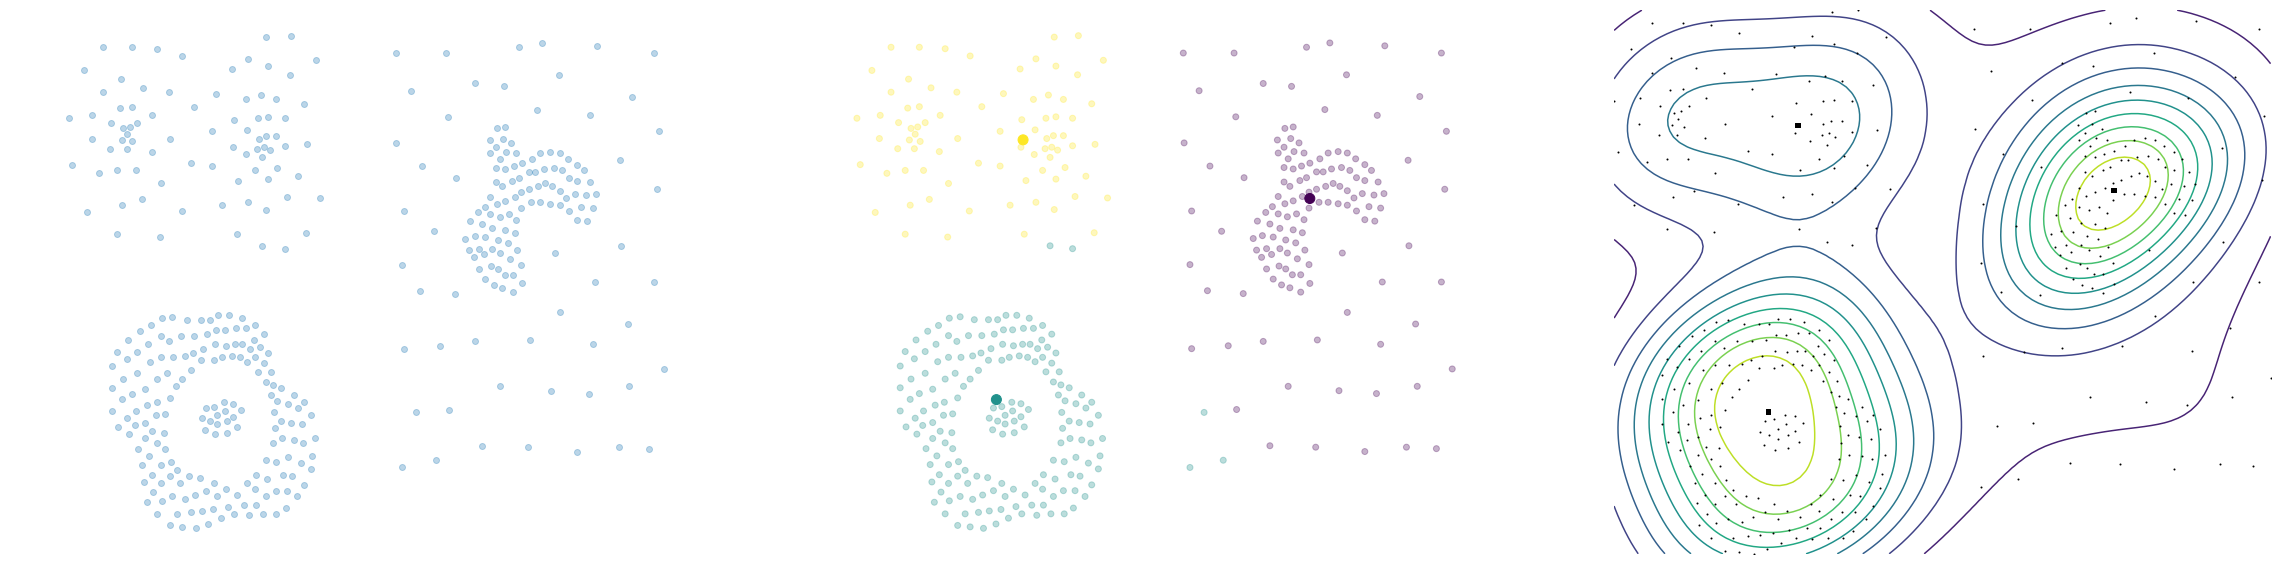

In [10]:
data = compound[:,:2]
ms4 = MeanShift(data)
ms4.fit()
clusterlocations = ms4._cluster_centers
results = ms4._results
labels = ms4._cluster_labels
bandwidth = ms4._bandwidth    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(data[:,0],data[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(data[:,0],data[:,1],alpha=.3, c = labels)
if ms4._outliers >0:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(0,max(labels)+1))
else:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
ma=np.max(np.max(Z)) #max of density
mi=np.min(np.min(Z)) #min of density
levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
axarr[2].contour(X,Y,Z, levels)
axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

plt.show()

150 iterations until termination.
Used bandwidth: 0.440243
Finished after 0:00:02.038353
Number of clusters found: 6.000000
There is/are 1.000000 outliers
Max within cluster distance to center: 1.734654
Mean within cluster distance to center: 0.176993
Sum of within cluster squared errors: 52.927623


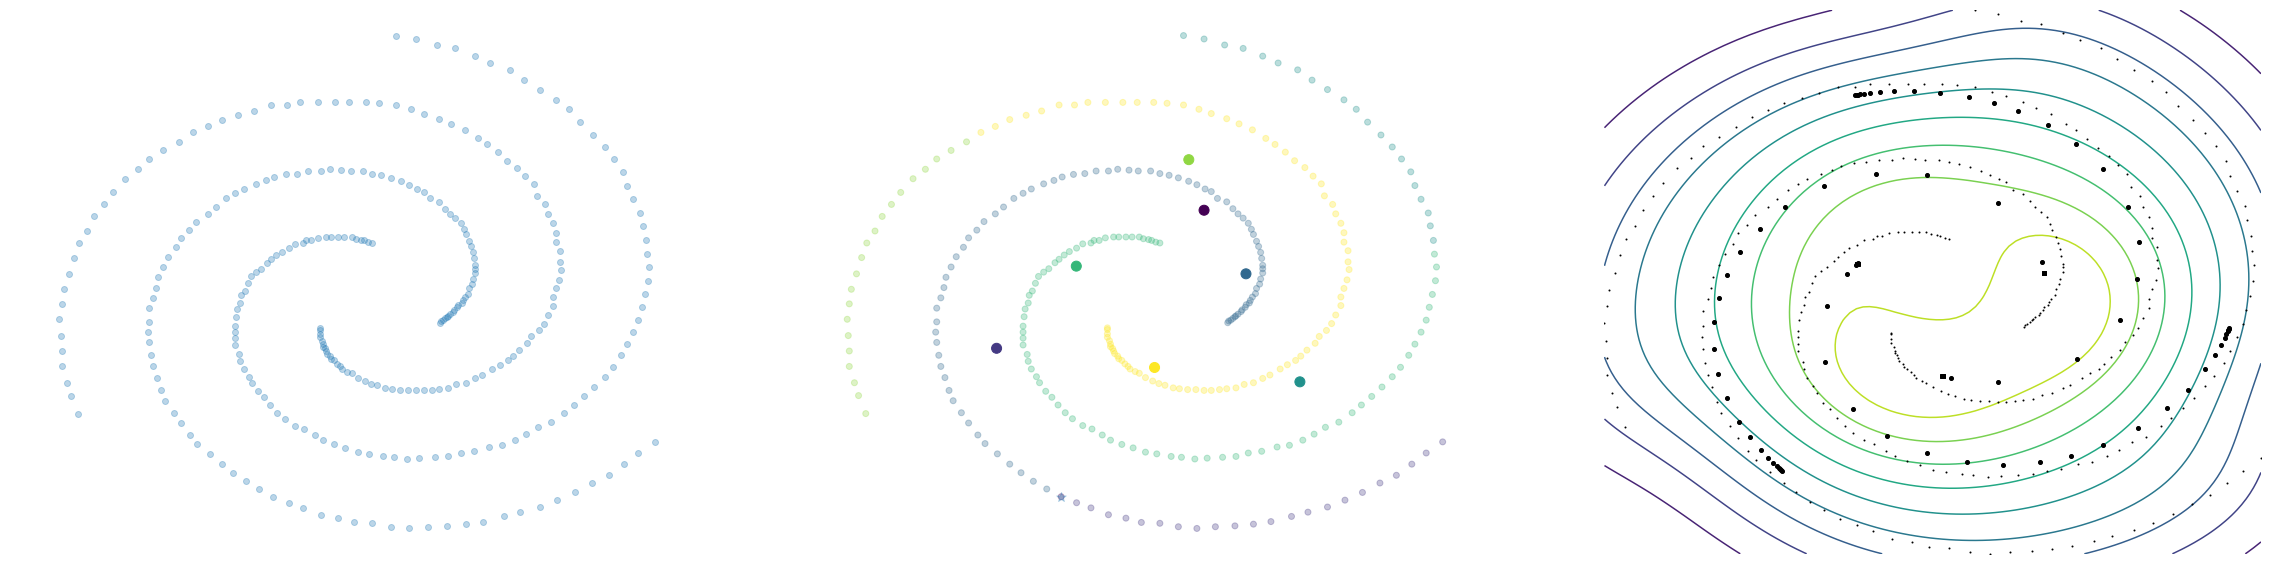

In [11]:
data = spiral
ms5 = MeanShift(data)
ms5.fit()
clusterlocations = ms5._cluster_centers
results = ms5._results
labels = ms5._cluster_labels
bandwidth = ms5._bandwidth    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(data[:,0],data[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(data[:,0],data[:,1],alpha=.3, c = labels)
if ms5._outliers >0:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(0,max(labels)+1))
else:
    axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
ma=np.max(np.max(Z)) #max of density
mi=np.min(np.min(Z)) #min of density
levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
axarr[2].contour(X,Y,Z, levels)
axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

plt.show()